### Código em Python para detecção de fraude em anúncios de celulares na OLX


#### Etapa 1

Adquirindo um arquivo CSV com os dados

In [168]:
from sklearn import preprocessing
import pandas as pd

# Abrir a base de dados
tabela = pd.read_csv('train.csv')
display(tabela)


,Marca,Modelo,Condicao,Memoria,Bateria,Preco,TempoConta,Vendas,Golpe
0,Samsung,Galaxy A71,Com defeito,32,Boa (80% ate 94%),321.48,355,16,Nao
1,Samsung,Galaxy S21,Recondicionado,32,Perfeita (95% ate 100%),311.40,227,7,Nao
2,Motorola,Motorola Edge 30,Usado - Bom,64,Boa (80% ate 94%),510.50,40,1,Nao
3,Motorola,Motorola G7,Recondicionado,64,Ruim (40% ate 59%),612.76,278,9,Nao
4,Motorola,Motorola G7,Usado - Excelente,64,Perfeita (95% ate 100%),532.50,138,1,Nao
...,...,...,...,...,...,...,...,...,...
11995,Samsung,Galaxy A51,Usado - Bom,64,Perfeita (95% ate 100%),1378.63,226,6,Nao
11996,Apple,iPhone 8 Plus,Recondicionado,32,Ok (60% ate 79%),1169.35,148,16,Sim
11997,Apple,iPhone 8 Plus,Usado - Bom,32,Perfeita (95% ate 100%),1230.83,247,1,Sim
11998,Samsung,Galaxy S21,Novo,32,Perfeita (95% ate 100%),1333.02,101,19,Nao


#### Etapa 2

Codificando os dados em uma matriz de números inteiros, que irão ser utilizados nos algoritmos de classificação

In [169]:

enc = preprocessing.OrdinalEncoder()

codes = enc.fit(tabela[["Marca", "Modelo", "Condicao", "Bateria", "Golpe"]])
transformedData = codes.transform(tabela[["Marca", "Modelo", "Condicao", "Bateria", "Golpe"]])

resultData = pd.DataFrame(
    {
        "Marca": transformedData[:, 0],
        "Modelo": transformedData[:, 1],
        "Condicao": transformedData[:, 2],
        "Memoria": tabela["Memoria"],
        "Bateria": transformedData[:, 3],
        "Preco": tabela["Preco"],
        "TempoConta": tabela["TempoConta"],
        "Vendas": tabela["Vendas"],	
        "Golpe": transformedData[:, 4]
    }
)


#### Continuação - Etapa 2

Mostrando os dados transformados

       Marca  Modelo  Condicao  Memoria  Bateria    Preco  TempoConta  Vendas  \
0        2.0     1.0       0.0       32      0.0   321.48         355      16   
1        2.0     3.0       2.0       32      3.0   311.40         227       7   
2        1.0     5.0       3.0       64      0.0   510.50          40       1   
3        1.0     6.0       2.0       64      4.0   612.76         278       9   
4        1.0     6.0       4.0       64      3.0   532.50         138       1   
...      ...     ...       ...      ...      ...      ...         ...     ...   
11995    2.0     0.0       3.0       64      3.0  1378.63         226       6   
11996    0.0    13.0       2.0       32      2.0  1169.35         148      16   
11997    0.0    13.0       3.0       32      3.0  1230.83         247       1   
11998    2.0     3.0       1.0       32      3.0  1333.02         101      19   
11999    2.0     2.0       2.0      256      1.0   639.79          21      20   

       Golpe  
0        0.0

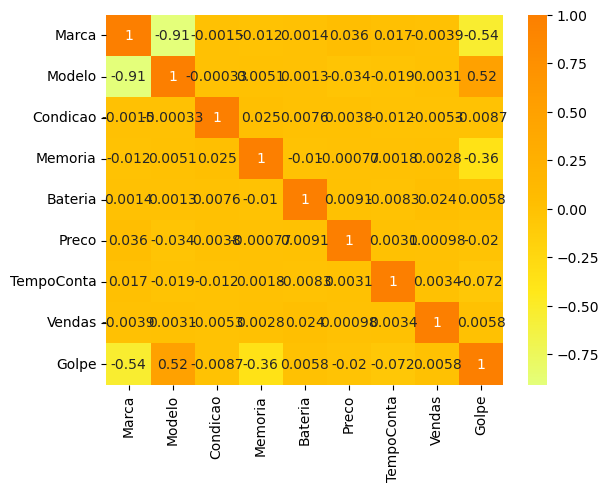

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

print(resultData)

# Análise preliminar
sns.heatmap(resultData.corr(), annot=True, cmap="Wistia")
plt.show()

#### Etapa 3

Criando um conjunto de teste e um de validação, usando a base de dados original.

In [171]:
# Machine learning
from sklearn.model_selection import train_test_split

# Dividir a base de dados em x e y de treino e de teste
y = resultData["Golpe"]
x = resultData[["Marca", "Modelo", "Condicao", "Memoria","Bateria", "Preco", "TempoConta", "Vendas"]]


x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

#### Etapa 4

Usando os algoritmos de Regressão Linear e de Randon Forest para aprender os padrões dos dados utilizados

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import metrics

# Criar os dois modelos de IAs
modelo_RegressãoLinear = LinearRegression()
modelo_RandomForest = RandomForestRegressor()
modelo_AdaBoost = AdaBoostRegressor()

# Treinar as duas IAs com o x e y de treino
modelo_RegressãoLinear.fit(x_treino, y_treino)
modelo_RandomForest.fit(x_treino, y_treino)
modelo_AdaBoost.fit(x_treino, y_treino)

# Testar as duas IAs e ver qual tem melhor desempenho no indice R²
previsao_RegressãoLinear = modelo_RegressãoLinear.predict(x_teste)
previsao_RandomForest = modelo_RandomForest.predict(x_teste)
previsao_AdaBoost = modelo_AdaBoost.predict(x_teste)

print(f'R² da Regressão Linear: {metrics.r2_score(y_teste, previsao_RegressãoLinear)}')
print(f'R² da Random Forest: {metrics.r2_score(y_teste, previsao_RandomForest)}') # Maior R² é RandomForest
print(f'R² da Ada Boost: {metrics.r2_score(y_teste, previsao_AdaBoost)}')

R² da Regressão Linear: 0.43408386514355035
R² da Random Forest: 1.0
R² da Ada Boost: 1.0


In [173]:
# Usar o modelo para prever novos dados
tabela_previsao = pd.read_csv('test.csv')

transformedData2 = codes.transform(tabela_previsao[["Marca", "Modelo", "Condicao", "Bateria", "Golpe"]])
resultData2 = pd.DataFrame(
    {
        "Marca": transformedData2[:, 0],
        "Modelo": transformedData2[:, 1],
        "Condicao": transformedData2[:, 2],
        "Memoria": tabela_previsao["Memoria"],
        "Bateria": transformedData2[:, 3],
        "Preco": tabela_previsao["Preco"],
        "TempoConta": tabela_previsao["TempoConta"],
        "Vendas": tabela_previsao["Vendas"],	
        "Golpe": transformedData2[:, 4]
    }
)

tabela_previsao['Golpe'] = modelo_AdaBoost.predict(resultData2[["Marca", "Modelo", "Condicao", "Memoria","Bateria", "Preco", "TempoConta", "Vendas"]])
display(tabela_previsao)


,Marca,Modelo,Condicao,Memoria,Bateria,Preco,TempoConta,Vendas,Golpe
0,Motorola,Motorola G7,Usado - Excelente,128,Perfeita (95% ate 100%),501.31,275,5,0.0
1,Motorola,Motorola Edge 30,Novo,256,Boa (80% ate 94%),1280.17,35,19,0.0
2,Apple,iPhone 10,Usado - Excelente,128,Perfeita (95% ate 100%),1417.76,104,13,0.0
3,Motorola,Motorola G7,Novo,32,Ok (60% ate 79%),866.23,218,8,0.0
4,Apple,iPhone 10,Usado - Excelente,128,Perfeita (95% ate 100%),199.76,8,13,1.0
